## Problem Statement
This project aims to develop a classification model using the given dataset to predict the target variable or outcome. The dataset consists of various features related to party profiles, socio-economic segments, billing information, usage patterns, and other relevant factors.

## Dataset: 
1. PTY_PROFILE_SUB_TYPE: The sub-type of the party profile.
2. SOCIO_ECONOMIC_SEGMENT: The socio-economic segment of the party.
3. PARTY_NATIONALITY: The nationality of the party.
4. PARTY_GENDER_CD: The gender of the party.
5. TARGET: The target variable or outcome being predicted or analyzed.
6. YEAR_JOINED: The year in which the party joined.
7. CURRENT_YEAR: The current year.
8. BILL_AMOUNT: The amount billed.
9. PAID_AMOUNT: The amount paid.
10. PAYMENT_TRANSACTIONS: The number of payment transactions made.
11. PARTY_REV: The revenue associated with the party.
12. PREPAID_LINES: The number of prepaid lines.
13. POSTPAID_LINES: The number of postpaid lines.
14. OTHER_LINES: The number of other lines.
15. LINE_REV: The revenue associated with the lines.
16. STATUS: The status of the party.
17. MOUS_TO_LOCAL_MOBILES: Minutes of usage to local mobiles.
18. MOUS_FROM_LOCAL_MOBILES: Minutes of usage from local mobiles.
19. MOUS_TO_LOCAL_LANDLINES: Minutes of usage to local landlines.
20. MOUS_FROM_LOCAL_LANDLINES: Minutes of usage from local landlines.
21. MOUS_TO_INT_NUMBER: Minutes of usage to international numbers.
22. MOUS_FROM_INT_NUMBER: Minutes of usage from international numbers.
23. DATA_IN_BNDL: Data usage in the bundle.
24. DATA_OUT_BNDL: Data usage out of the bundle.
25. DATA_USG_PAYG: Pay-as-you-go data usage.
26. COMPLAINTS: The number of complaints.
27. Years_stayed: The number of years the party has stayed.

## Goal:
The goal is to build a model that can accurately predict the target variable based on the provided features. The outcome variable could be related to customer churn, customer satisfaction, revenue generation, or any other relevant metric.

## Methodology:

1. Data Preparation: The first step is to preprocess and prepare the dataset for analysis. This involves handling missing values, removing irrelevant columns, and encoding categorical variables if necessary. The dataset will be split into training and testing sets to evaluate the performance of the classification model.

2. Exploratory Data Analysis (EDA): Conducting EDA will provide insights into the distribution of the variables, identify any outliers, and explore the relationships between different features. Visualizations and statistical analysis will be performed to gain a better understanding of the data.

3. Feature Selection: Selecting the most relevant features is crucial for building an effective classification model. This step involves identifying the features that have the most impact on the target variable and removing any redundant or insignificant features. Techniques such as correlation analysis, feature importance, or dimensionality reduction methods can be applied.

4. Model Selection: Various machine learning algorithms will be considered for classification, such as logistic regression, decision trees, random forests, support vector machines,etc. The selection of the appropriate model will depend on the nature of the problem, the dataset size, and the desired performance metrics.

5. Model Training and Evaluation: The selected model will be trained on the training dataset using appropriate algorithms and hyperparameter tuning techniques. The performance of the model will be evaluated using evaluation metrics like accuracy, precision, recall, and F1 score.


# Importing the Neccessary Libraries

In [2]:
pip install opendatasets

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import opendatasets as od
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Data Extraction From Kaggle

In [ ]:
od.download('https://www.kaggle.com/datasets/mark18vi/telecom-churn-data')

In [6]:
data = pd.read_csv('telecom-churn-data/telecom_churn_me.csv', index_col=0)

# Data Exploration and Cleaning

In [7]:
data.head()

,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_NATIONALITY,PARTY_GENDER_CD,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,...,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
0,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,931.208938,812.175000,1,...,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0,0.0,0,25
1,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,431.082618,486.500000,1,...,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0,0.0,0,25
2,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,50.619644,52.815000,1,...,0.000,0.000,0.000,0.000,0.000,0.102539,0.0,0.0,0,25
3,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,399.710034,422.235000,1,...,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0,0.0,0,25
4,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,612.665844,825.888333,1,...,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0,0.0,0,25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140604 entries, 0 to 1140614
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PTY_PROFILE_SUB_TYPE       1140604 non-null  object 
 1   SOCIO_ECONOMIC_SEGMENT     1140604 non-null  object 
 2   PARTY_NATIONALITY          1140604 non-null  object 
 3   PARTY_GENDER_CD            1140604 non-null  object 
 4   TARGET                     1140604 non-null  int64  
 5   YEAR_JOINED                1140604 non-null  int64  
 6   CURRENT_YEAR               1140604 non-null  int64  
 7   BILL_AMOUNT                1140604 non-null  float64
 8   PAID_AMOUNT                1140604 non-null  float64
 9   PAYMENT_TRANSACTIONS       1140604 non-null  int64  
 10  PARTY_REV                  1140604 non-null  float64
 11  PREPAID_LINES              1140604 non-null  int64  
 12  POSTPAID_LINES             1140604 non-null  int64  
 13  OTHER_LINES 

In [9]:
data.describe()

,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,...,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
count,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,...,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06
mean,5.278344e-02,2.013381e+03,2.018947e+03,3.811804e+02,3.921391e+02,1.346936e+00,1.910809e+03,2.144700e+00,3.989309e+00,8.991026e-01,...,1.294176e+02,1.717134e+01,3.618600e+01,5.108442e+01,6.840673e+00,1.049152e+04,1.517181e-01,1.682793e+02,7.877668e-02,5.566531e+00
std,2.236010e-01,6.082378e+00,2.236010e-01,3.697039e+02,3.725608e+02,7.309284e-01,1.837015e+04,5.751809e+00,4.395115e+01,7.864311e+00,...,2.989452e+02,3.857446e+01,1.200172e+02,1.144493e+02,3.560459e+01,3.357222e+04,7.416291e+00,6.918396e+03,3.247740e-01,6.104279e+00
min,0.000000e+00,1.994000e+03,2.018000e+03,-2.810494e+03,0.000000e+00,0.000000e+00,-2.011420e+03,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.013000e+03,2.019000e+03,1.741378e+02,1.816667e+02,1.000000e+00,4.231879e+02,0.000000e+00,1.000000e+00,0.000000e+00,...,4.250000e-01,3.500000e-01,1.500000e-02,0.000000e+00,0.000000e+00,7.081016e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,0.000000e+00,2.016000e+03,2.019000e+03,2.907239e+02,3.007292e+02,1.000000e+00,8.347133e+02,1.000000e+00,2.000000e+00,0.000000e+00,...,2.944500e+01,7.160000e+00,1.002500e+01,2.175000e+00,0.000000e+00,4.394219e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,0.000000e+00,2.017000e+03,2.019000e+03,4.609771e+02,4.764233e+02,2.000000e+00,1.553675e+03,3.000000e+00,3.000000e+00,1.000000e+00,...,1.418950e+02,2.203500e+01,3.926000e+01,5.409000e+01,1.710000e+00,9.955910e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,2.018000e+03,2.019000e+03,2.702629e+04,2.274363e+04,3.000000e+01,5.455371e+05,9.560000e+02,1.282000e+03,1.853000e+03,...,3.139199e+04,2.185112e+04,2.034433e+04,4.021365e+03,1.616695e+04,8.984526e+05,1.912559e+03,9.990000e+05,1.300000e+01,2.500000e+01


In [10]:
data.duplicated().value_counts()

False    1140124
True         480
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    1140124
dtype: int64

In [12]:
data.isnull().sum()

PTY_PROFILE_SUB_TYPE         0
SOCIO_ECONOMIC_SEGMENT       0
PARTY_NATIONALITY            0
PARTY_GENDER_CD              0
TARGET                       0
YEAR_JOINED                  0
CURRENT_YEAR                 0
BILL_AMOUNT                  0
PAID_AMOUNT                  0
PAYMENT_TRANSACTIONS         0
PARTY_REV                    0
PREPAID_LINES                0
POSTPAID_LINES               0
OTHER_LINES                  0
LINE_REV                     0
STATUS                       0
MOUS_TO_LOCAL_MOBILES        0
MOUS_FROM_LOCAL_MOBILES      0
MOUS_TO_LOCAL_LANDLINES      0
MOUS_FROM_LOCAL_LANDLINES    0
MOUS_TO_INT_NUMBER           0
MOUS_FROM_INT_NUMBER         0
DATA_IN_BNDL                 0
DATA_OUT_BNDL                0
DATA_USG_PAYG                0
COMPLAINTS                   0
Years_stayed                 0
dtype: int64

# Exploratory Data Analysis

In [13]:
data['TARGET'].unique()

array([0, 1], dtype=int64)

<AxesSubplot: xlabel='TARGET', ylabel='count'>

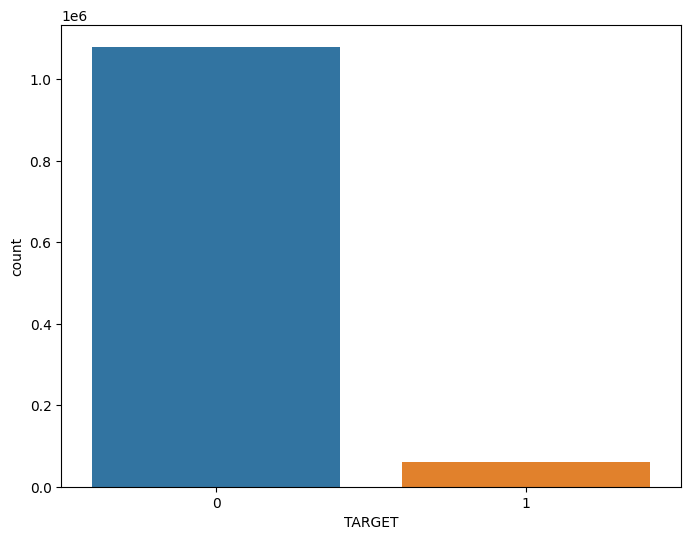

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='TARGET',data=data)

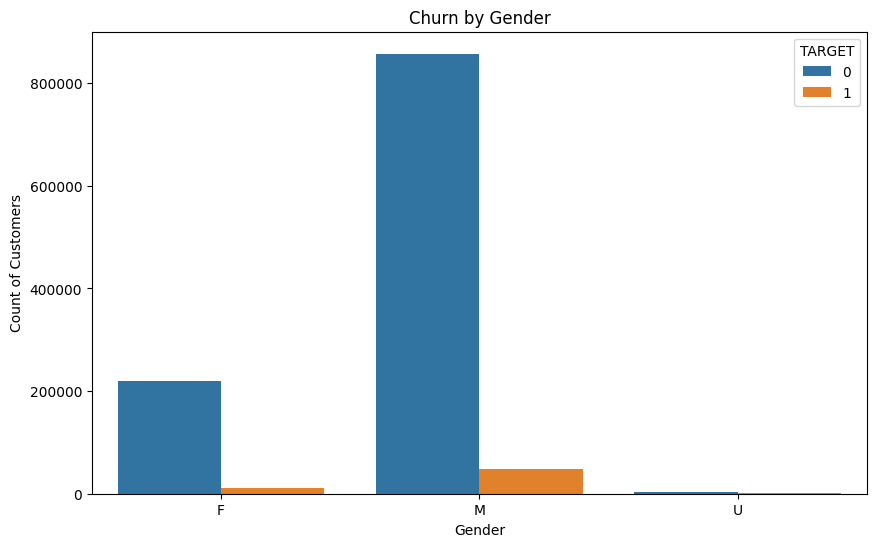

In [15]:
plt.figure(figsize=(10,6))
gender_group = data.groupby(['PARTY_GENDER_CD', 'TARGET'])['PARTY_GENDER_CD'].count().reset_index(name='count')

sns.barplot(x='PARTY_GENDER_CD', y='count', hue='TARGET', data=gender_group)

plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.title('Churn by Gender')
plt.show()

This suggests that the majority of the churned customers are male (80%) while only a small percentage are female (20%). The distribution of gender among the customer base is skewed towards males and females, with fewer customers identifying as other.

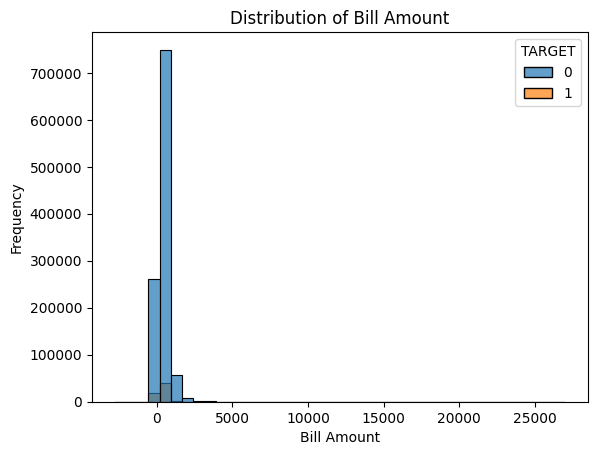

In [16]:
sns.histplot(data=data, x='BILL_AMOUNT', hue='TARGET', bins=40, alpha=0.7)
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Amount')
plt.show()

The analysis of the bill amount column reveals that the majority of non-churned customers have a bill amount ranging from 0 to 2500 or around 250000. On the other hand, a significant number of non-churned customers have negative or defaulted bill amounts. In contrast, churned customers tend to have much lower bill amounts compared to the overall distribution. This suggests that bill amount may be a factor in customer churn.

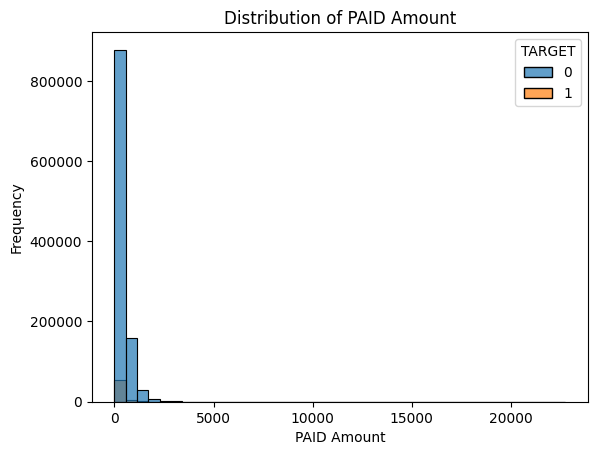

In [17]:
sns.histplot(data=data, x='PAID_AMOUNT', hue='TARGET', bins=40, alpha=0.7)
plt.xlabel('PAID Amount')
plt.ylabel('Frequency')
plt.title('Distribution of PAID Amount')
plt.show()

It appears that there is a correlation between a customer's bill amount and their likelihood to churn. Customers with lower bill amounts tend to be more likely to churn compared to those with higher bill amounts. However, it is worth noting that even some high bill amount customers are still churning, indicating that there may be other factors at play. Further analysis is needed to determine the reasons behind these churns among high bill amount customers.

In [18]:
mean_churned = data[data["TARGET"] == 1]["BILL_AMOUNT"].mean()
mean_not_churned = data[data["TARGET"] == 0]["BILL_AMOUNT"].mean()

std_churned = data[data["TARGET"] == 1]["BILL_AMOUNT"].std()
std_not_churned = data[data["TARGET"] == 0]["BILL_AMOUNT"].std()

print("Mean Bill Amount for Churned Customers:", mean_churned)
print("Mean Bill Amount for Non-Churned Customers:", mean_not_churned)

print("Standard Deviation of Bill Amount for Churned Customers:", std_churned)
print("Standard Deviation of Bill Amount for Non-Churned Customers:", std_not_churned)

Mean Bill Amount for Churned Customers: 292.88632541951256
Mean Bill Amount for Non-Churned Customers: 386.26845276523153
Standard Deviation of Bill Amount for Churned Customers: 251.21456181459612
Standard Deviation of Bill Amount for Non-Churned Customers: 374.5872319648636


The mean bill amount for customers who have churned is significantly lower, at 292.92 Dollar, compared to the mean bill amount for customers who have not churned, at 386.29 Dollar. This suggests that customers who spend less on their monthly bill may be more likely to churn. Additionally, the standard deviation of the bill amount for churned customers is lower than that for non-churned customers, which suggests that the amount spent by churned customers is more consistent and predictable.

In [19]:
data['COMPLAINTS'].unique()

array([ 0,  1,  2,  4,  3,  5, 13,  9,  6,  7, 10, 11,  8, 12],
      dtype=int64)

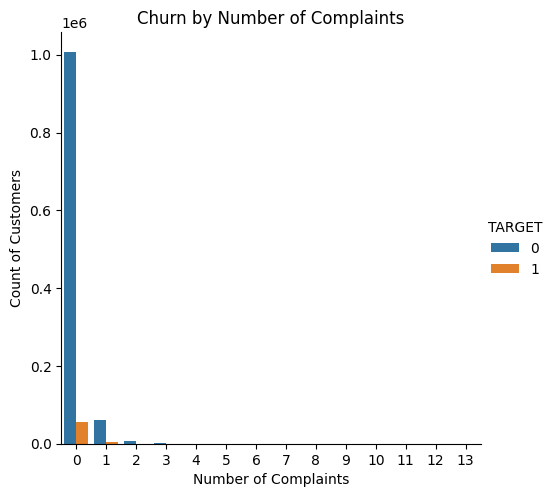

In [20]:
complaint_group = data.groupby(['COMPLAINTS', 'TARGET'])['COMPLAINTS'].count().reset_index(name='count')
sns.catplot(x='COMPLAINTS', y='count', hue='TARGET', kind='bar', data=complaint_group)
plt.title('Churn by Number of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Count of Customers')
plt.show()

This plot indicates that the number of complaints alone may not be the sole reason for churn. While some customers may have left after filing a complaint, it is possible that there were other unresolved issues that led to their departure. Further investigation is needed to determine the root cause of churn in these cases, and to develop strategies for reducing churn in response to complaints.

In [21]:
data['STATUS'].unique()

array(['ACTIVE', 'Out Going Bar Confirmed', 'TOSSED', 'Final Warning',
       'Tos Confirmed', 'Out Going Bar Authorized',
       'Identified For Final Warning', 'Tos Authorized',
       'Identified For Out Going Bar'], dtype=object)

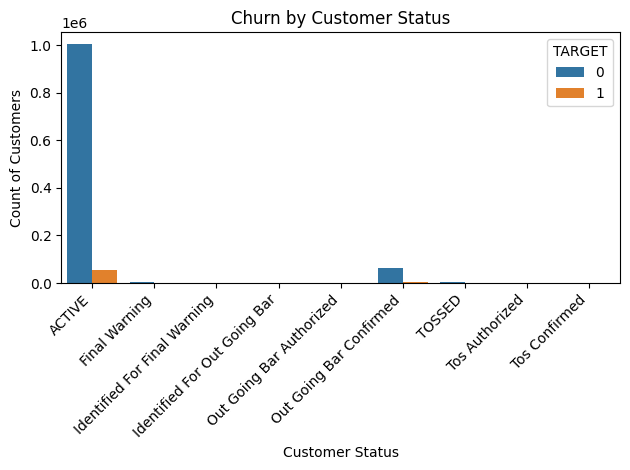

In [22]:
status_group = data.groupby(['STATUS', 'TARGET'])['STATUS'].count().reset_index(name='count')

ax = sns.barplot(x='STATUS', y='count', hue='TARGET', data=status_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Customer Status')
plt.ylabel('Count of Customers')
plt.title('Churn by Customer Status')
plt.tight_layout()
plt.show()

This indicates that a customer's status may not be the sole factor contributing to churn. The majority of churned customers were active, however 9.6% of churned customers were classified as outgoing barred or defaulted customers. Further analysis is needed to fully understand the relationship between outgoing barred and churn.

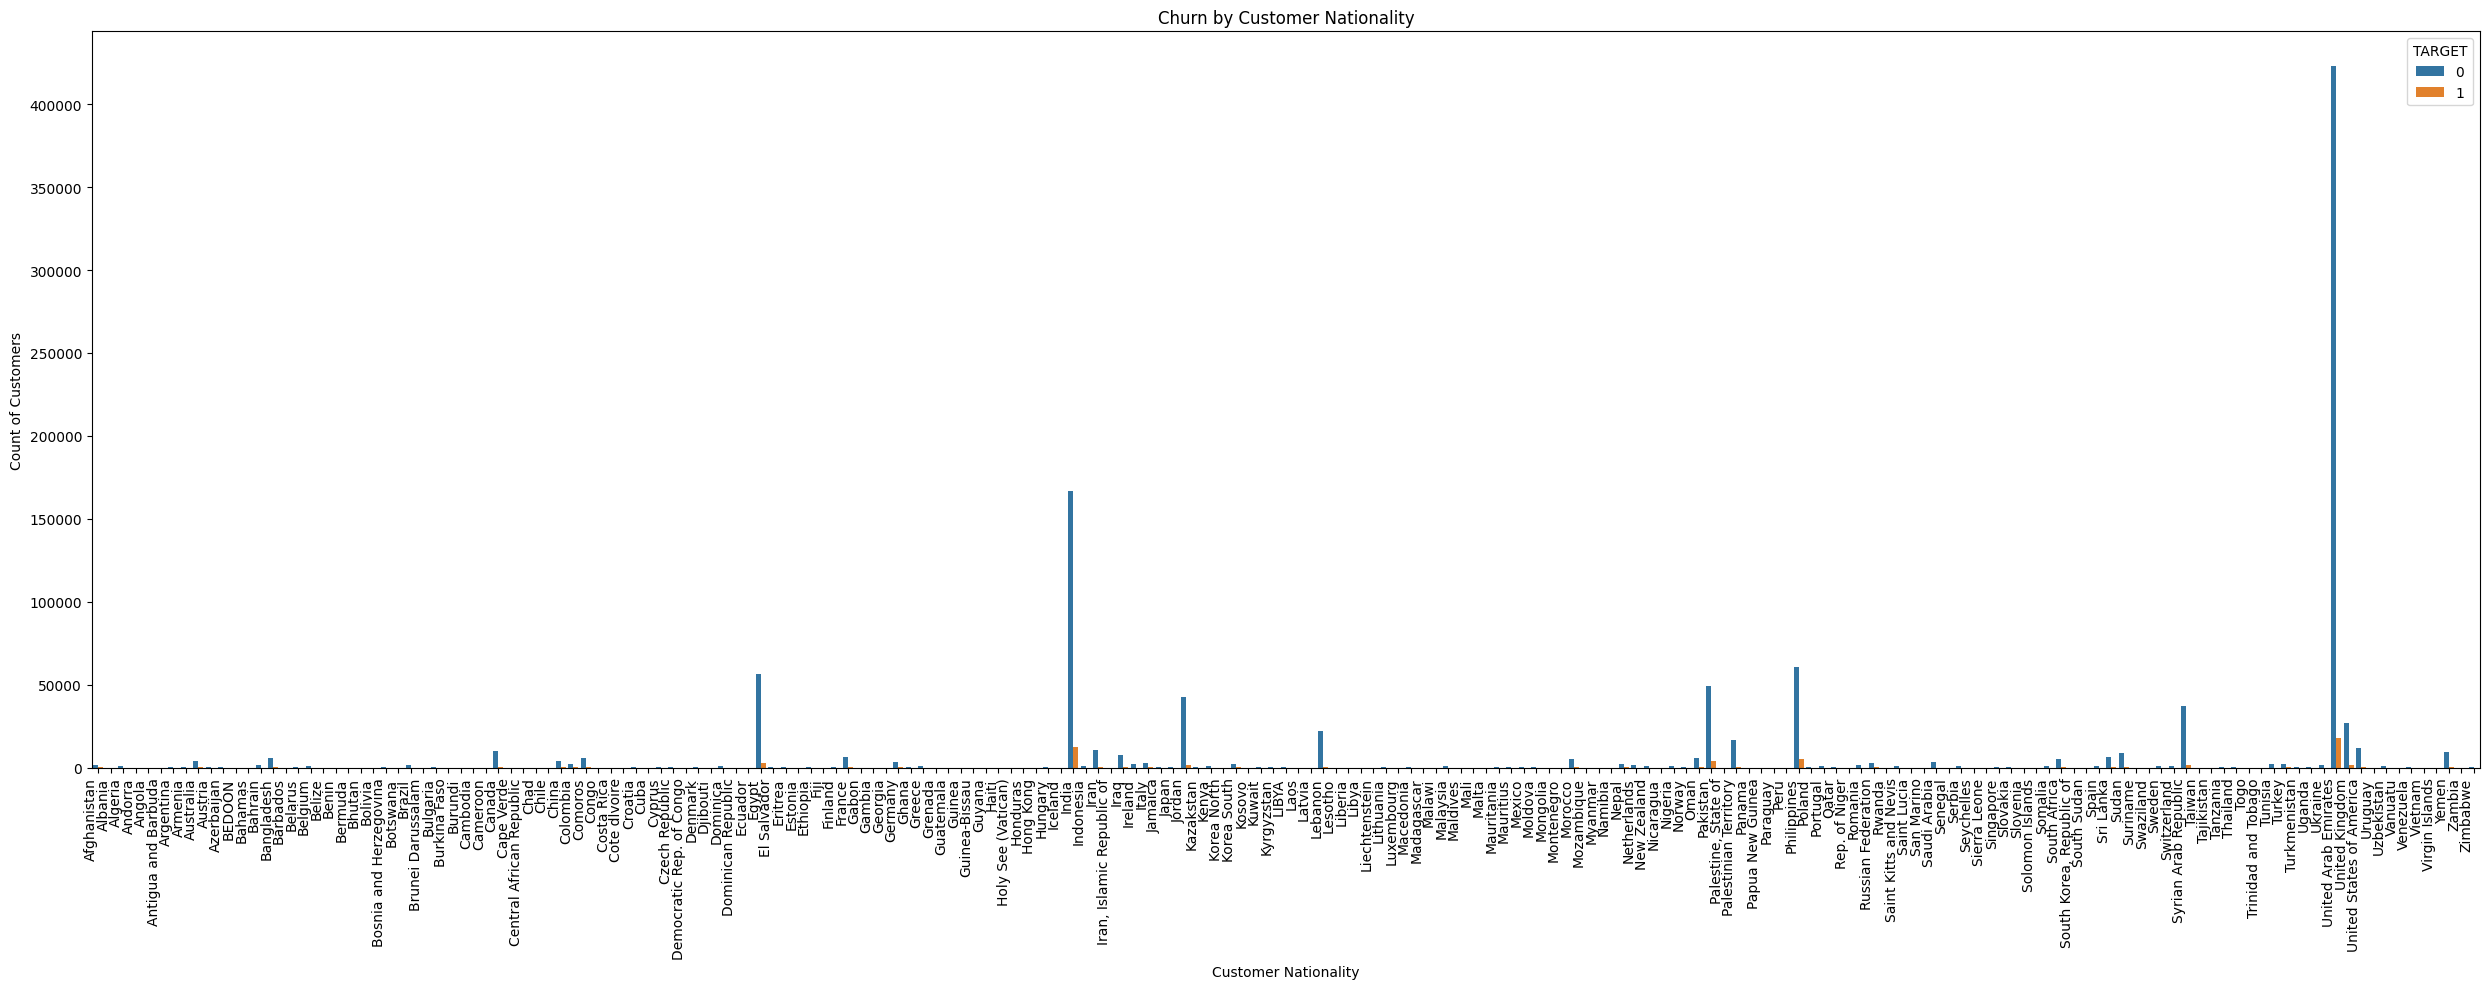

In [23]:
plt.figure(figsize =(25,10))
status_group = data.groupby(['PARTY_NATIONALITY', 'TARGET'])['PARTY_NATIONALITY'].count().reset_index(name='count')
ax = sns.barplot(x='PARTY_NATIONALITY', y='count', hue='TARGET', data=status_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Customer Nationality')
plt.ylabel('Count of Customers')
plt.title('Churn by Customer Nationality')
plt.tight_layout()
plt.show()

The country with the highest number of churned customers is the UAE, followed by India, the Philippines, Pakistan, Egypt,UK, and Jordan. Further analysis is needed to understand the specific reasons for customer churn in each of these countries, as internal factors and laws may play a role.

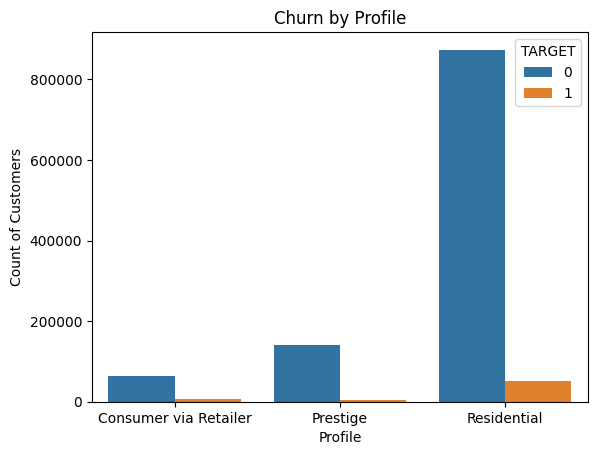

In [24]:
status_group = data.groupby(['PTY_PROFILE_SUB_TYPE', 'TARGET'])['PTY_PROFILE_SUB_TYPE'].count().reset_index(name='count')
sns.barplot(x='PTY_PROFILE_SUB_TYPE', y='count', hue='TARGET', data=status_group)
plt.xlabel('Profile')
plt.ylabel('Count of Customers')
plt.title('Churn by Profile')
plt.show()

As we can see, residential customers have the highest churn rate, but consumers through retailers have a 10% churn rate, which is the highest among the three profile categories. It seems that it is impacted in a very high manner by churn.

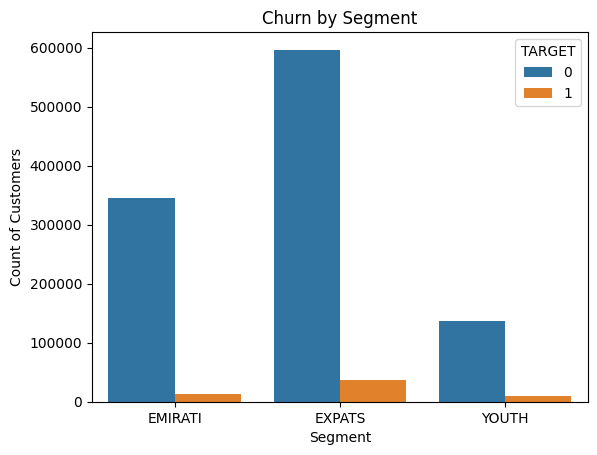

In [25]:
status_group = data.groupby(['SOCIO_ECONOMIC_SEGMENT', 'TARGET'])['SOCIO_ECONOMIC_SEGMENT'].count().reset_index(name='count')
sns.barplot(x='SOCIO_ECONOMIC_SEGMENT', y='count', hue='TARGET', data=status_group)
plt.xlabel('Segment')
plt.ylabel('Count of Customers')
plt.title('Churn by Segment')
plt.show()

As we can see, expatriates hold the highest chance of churning. In addition, Emiratis and youth are comparatively at lower risk for churning. This can be a strong reason for churn to happen within the industry.

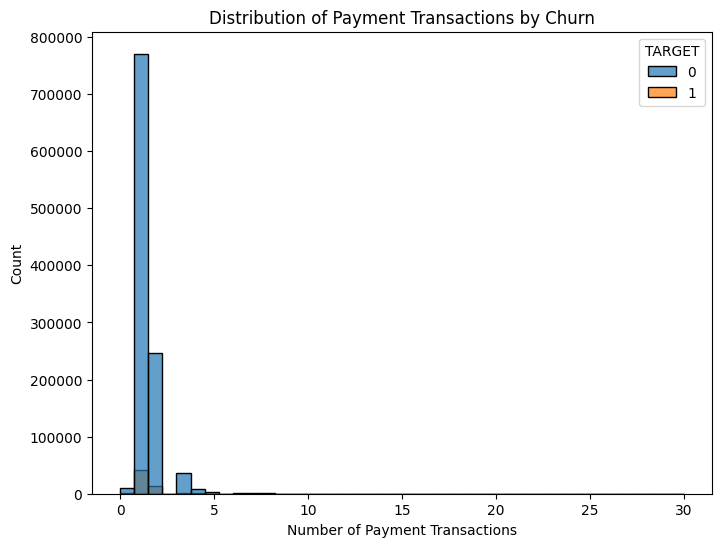

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='PAYMENT_TRANSACTIONS', hue='TARGET',bins=40, alpha=0.7)
plt.xlabel('Number of Payment Transactions')
plt.ylabel('Count')
plt.title('Distribution of Payment Transactions by Churn')
plt.show()

The majority of customers conducted only 0 to 5 payment transactions. Interestingly, churned customers were primarily concentrated within the range of 1 or 2 payment transactions. Given the highest density of customers within this range, it suggests that churn is not directly related to the number of payment transactions. Other factors may contribute more significantly to customer churn, and further investigation is needed to uncover those underlying causes.

In [27]:
def plot_boxplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    numeric_columns = [col for col in numeric_columns if col != 'TARGET']

    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x='TARGET', y=col)
        plt.xlabel('Churn')
        plt.ylabel(col)
        plt.title(f'Distribution of {col} by Churn')
        plt.show()

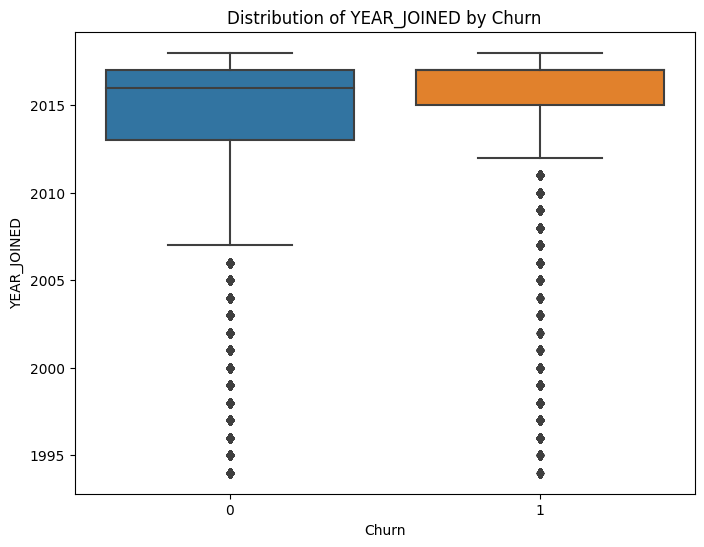

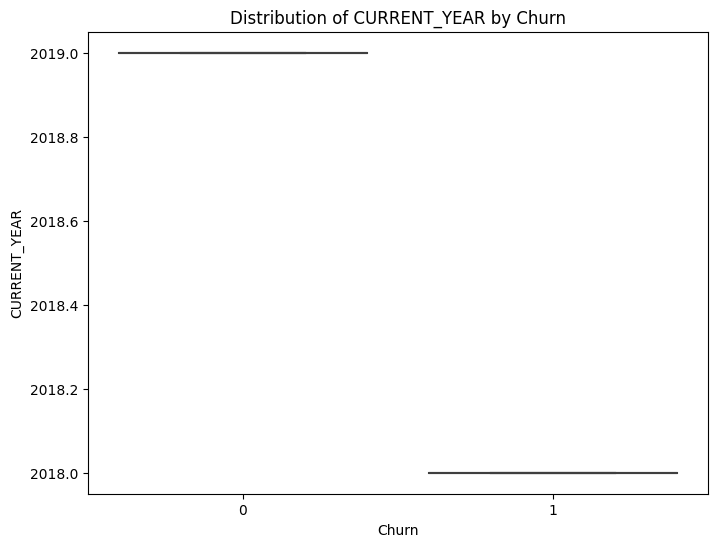

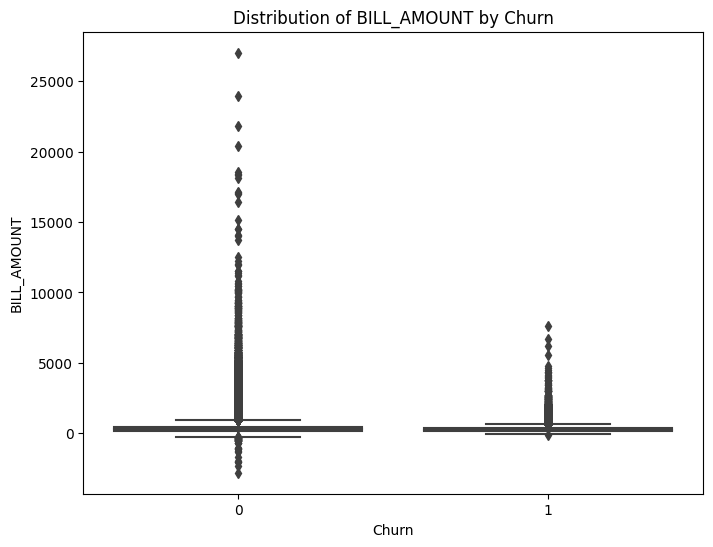

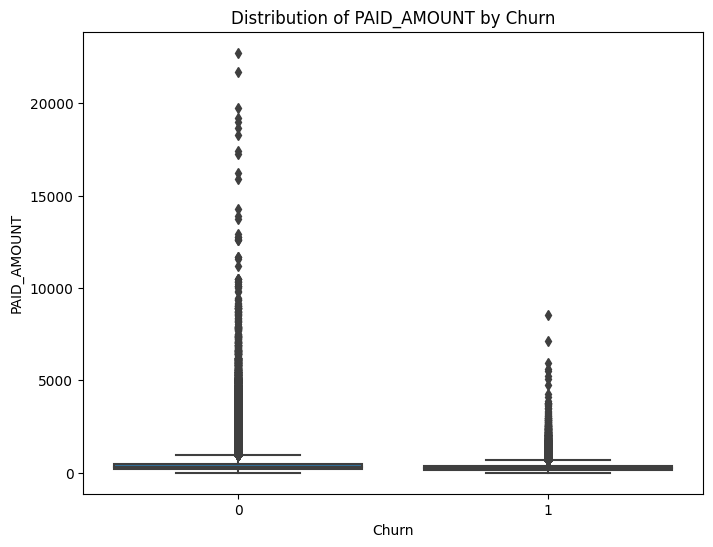

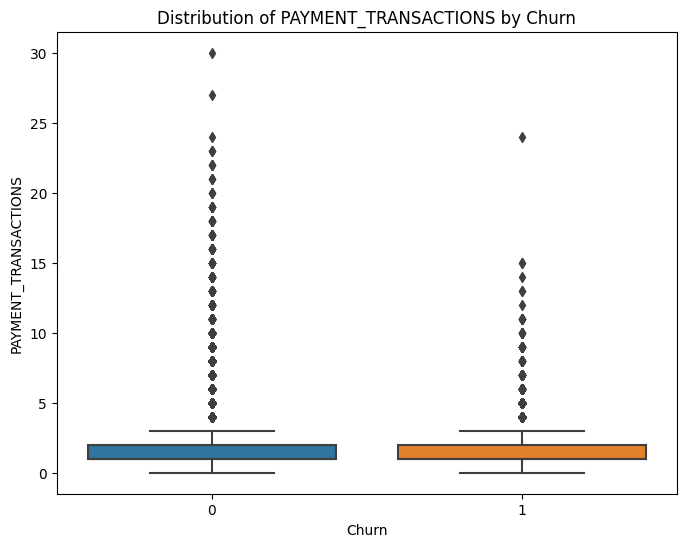

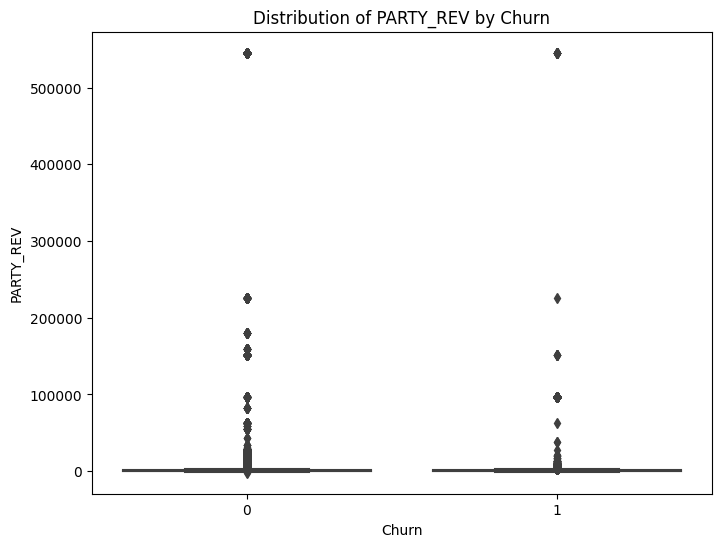

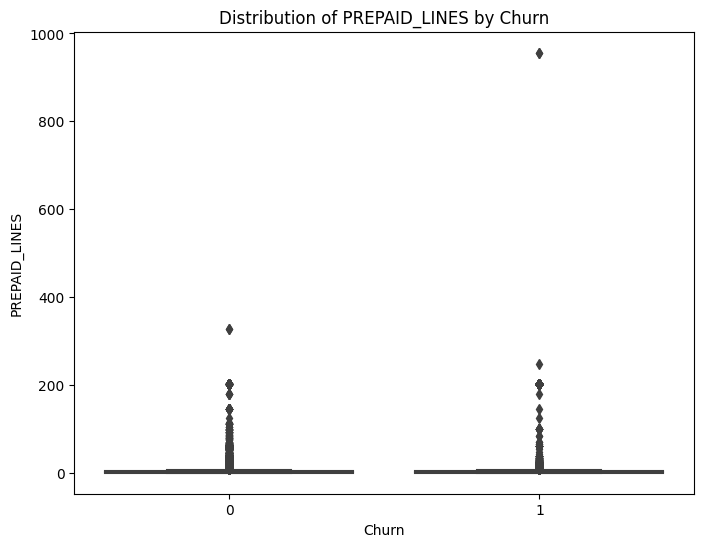

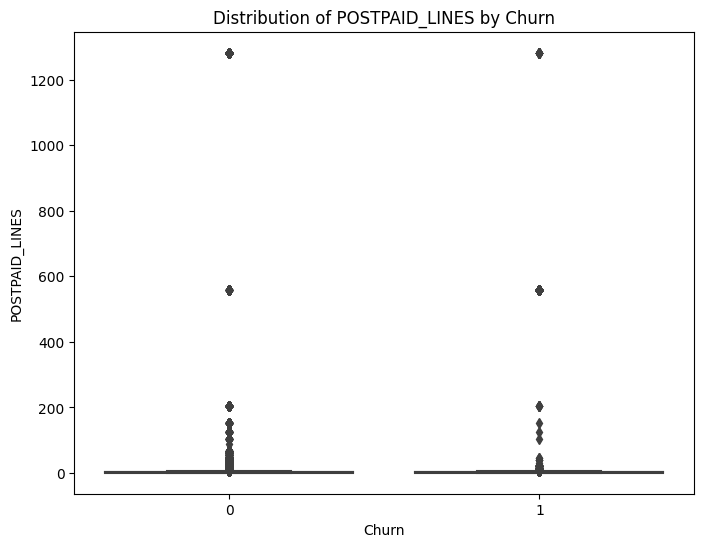

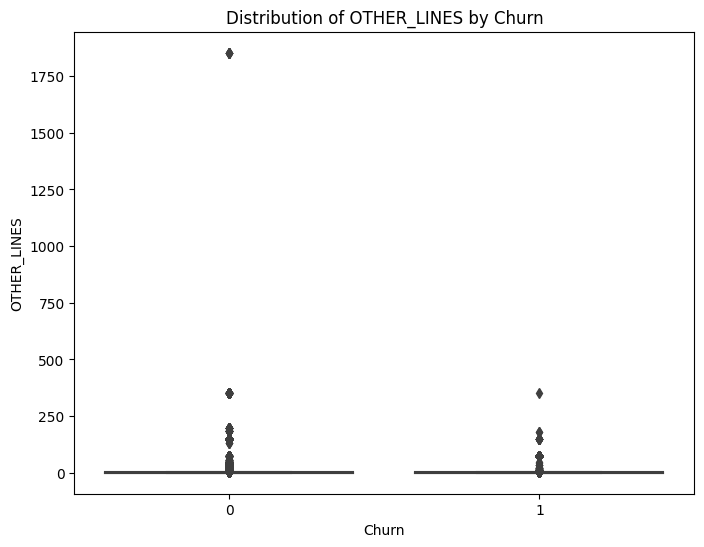

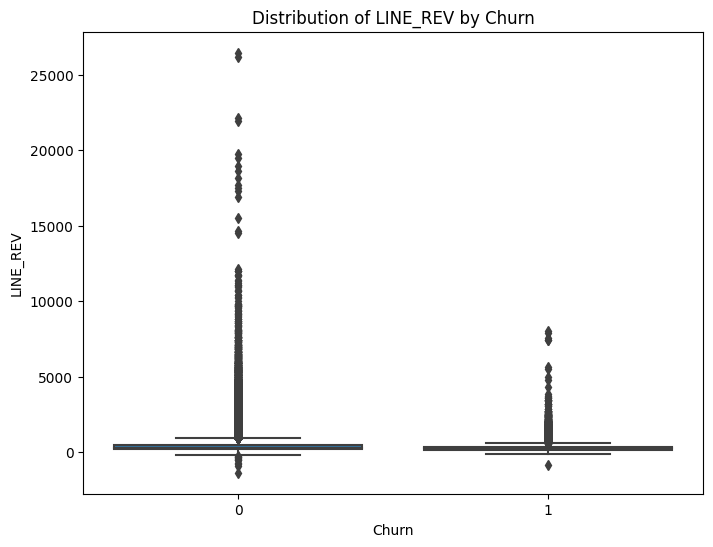

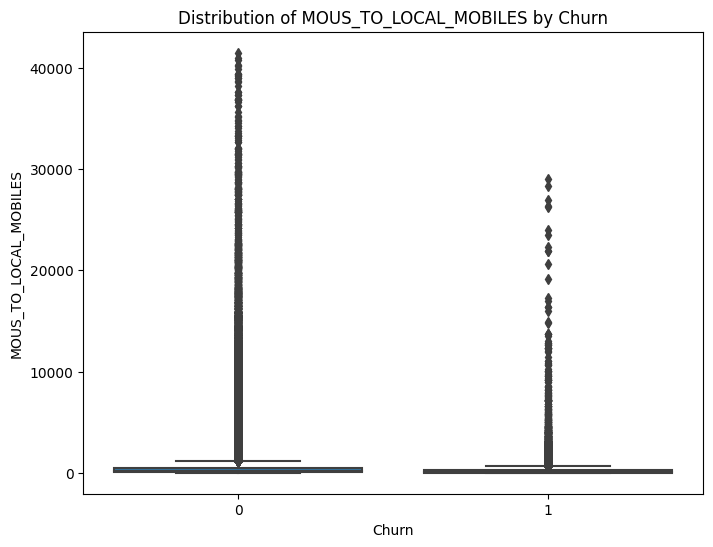

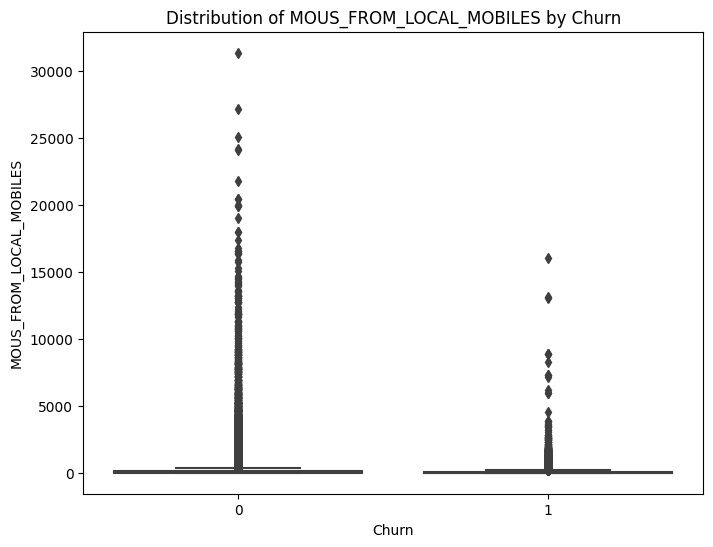

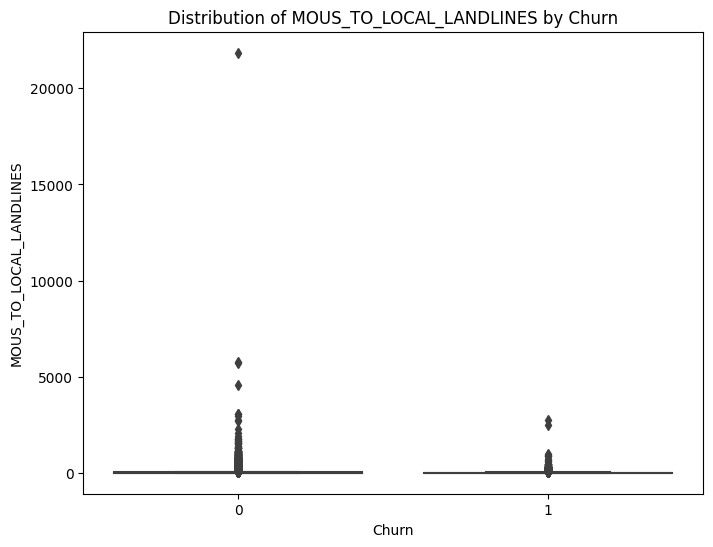

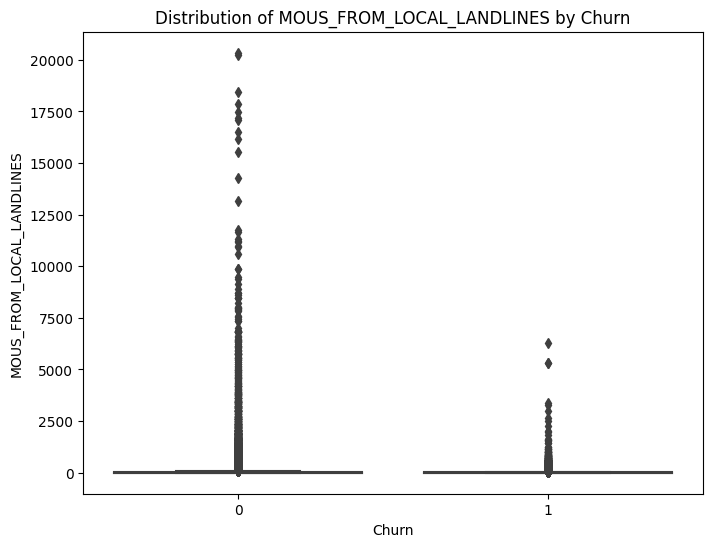

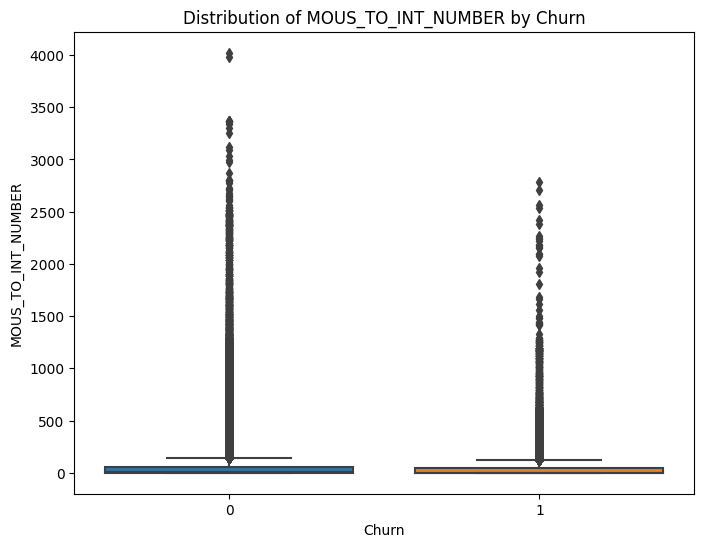

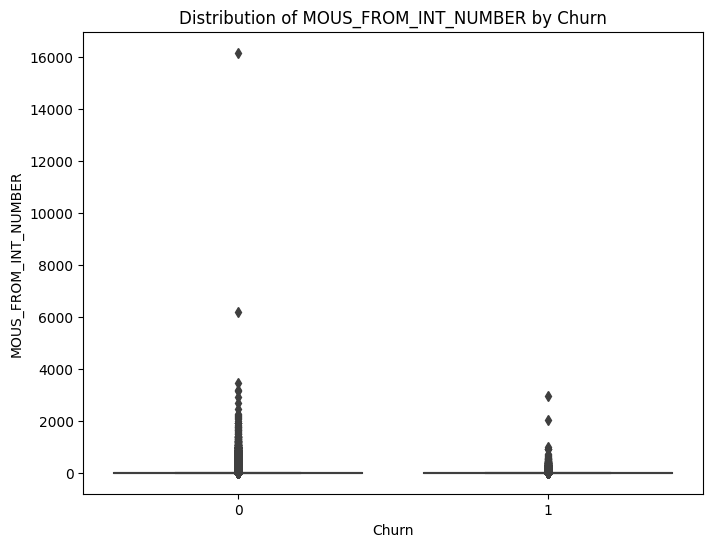

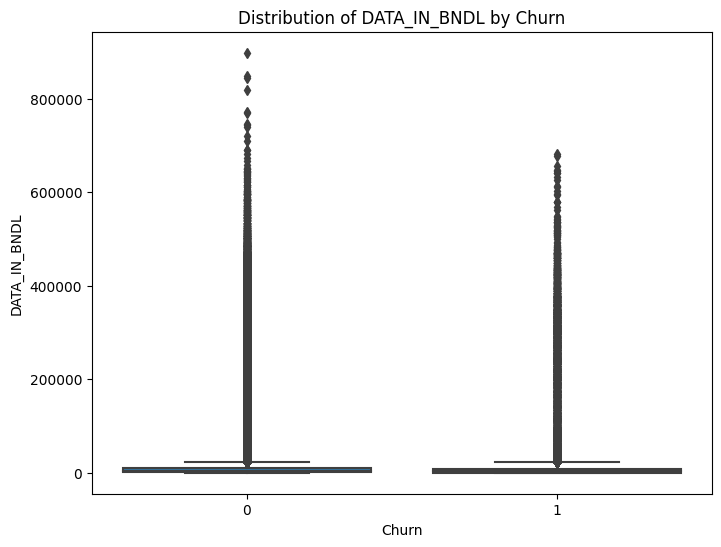

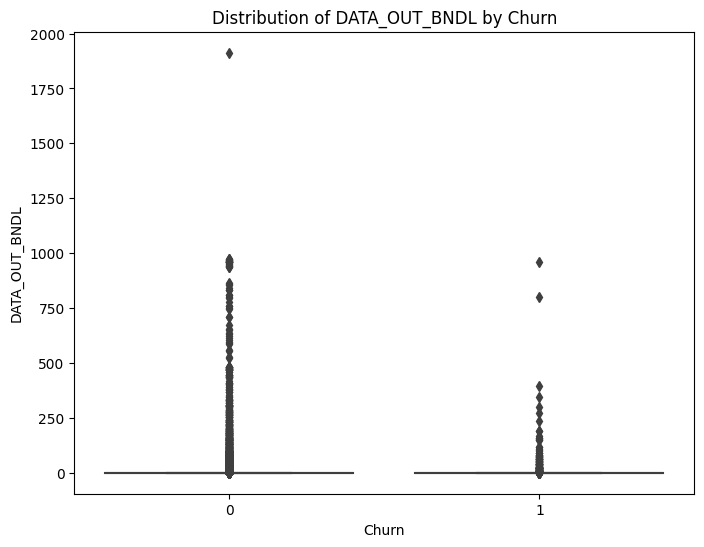

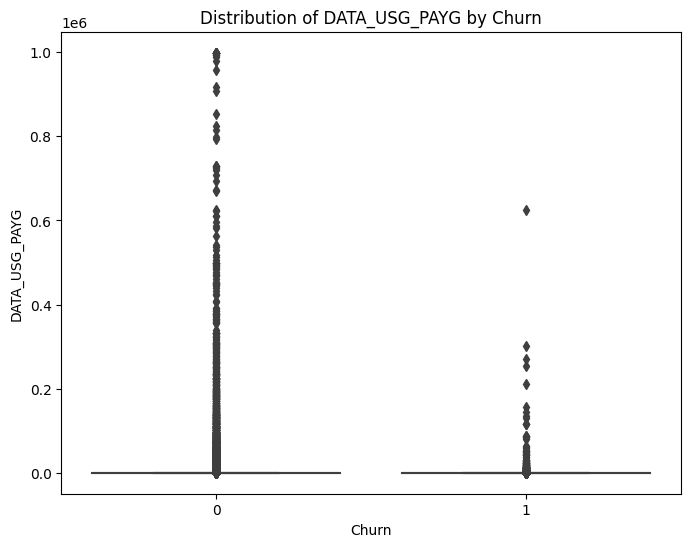

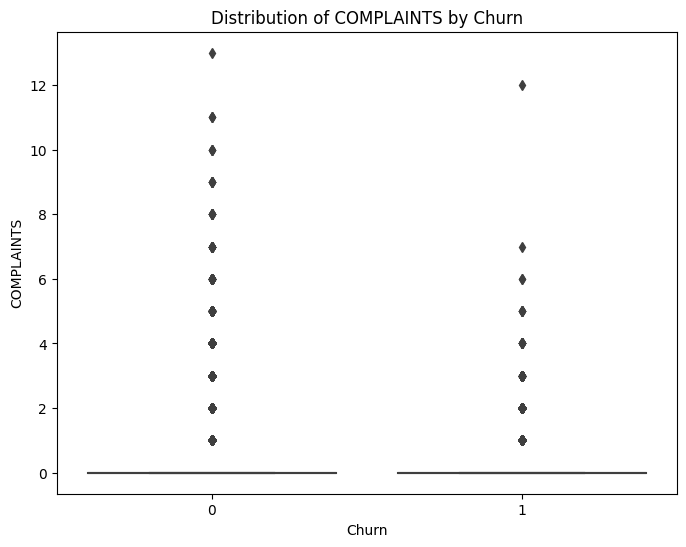

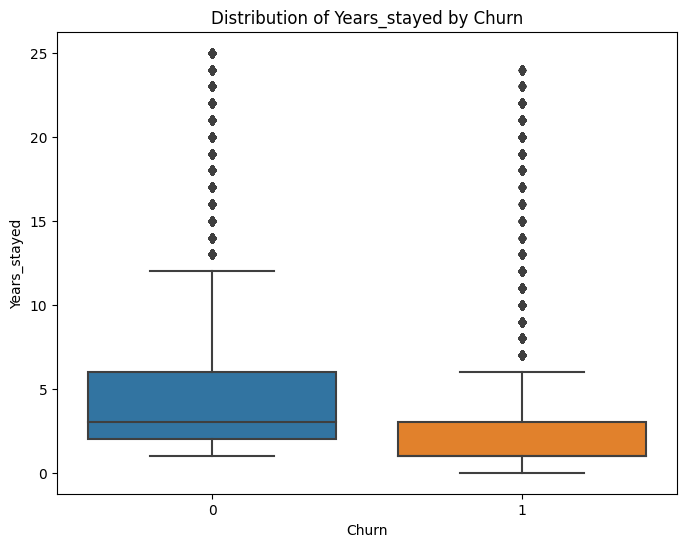

In [28]:
plot_boxplots(data)

Upon analyzing the data, it appears that there are numerous outliers present in the dataset. It is essential to address these outliers before proceeding with model training.

<AxesSubplot: >

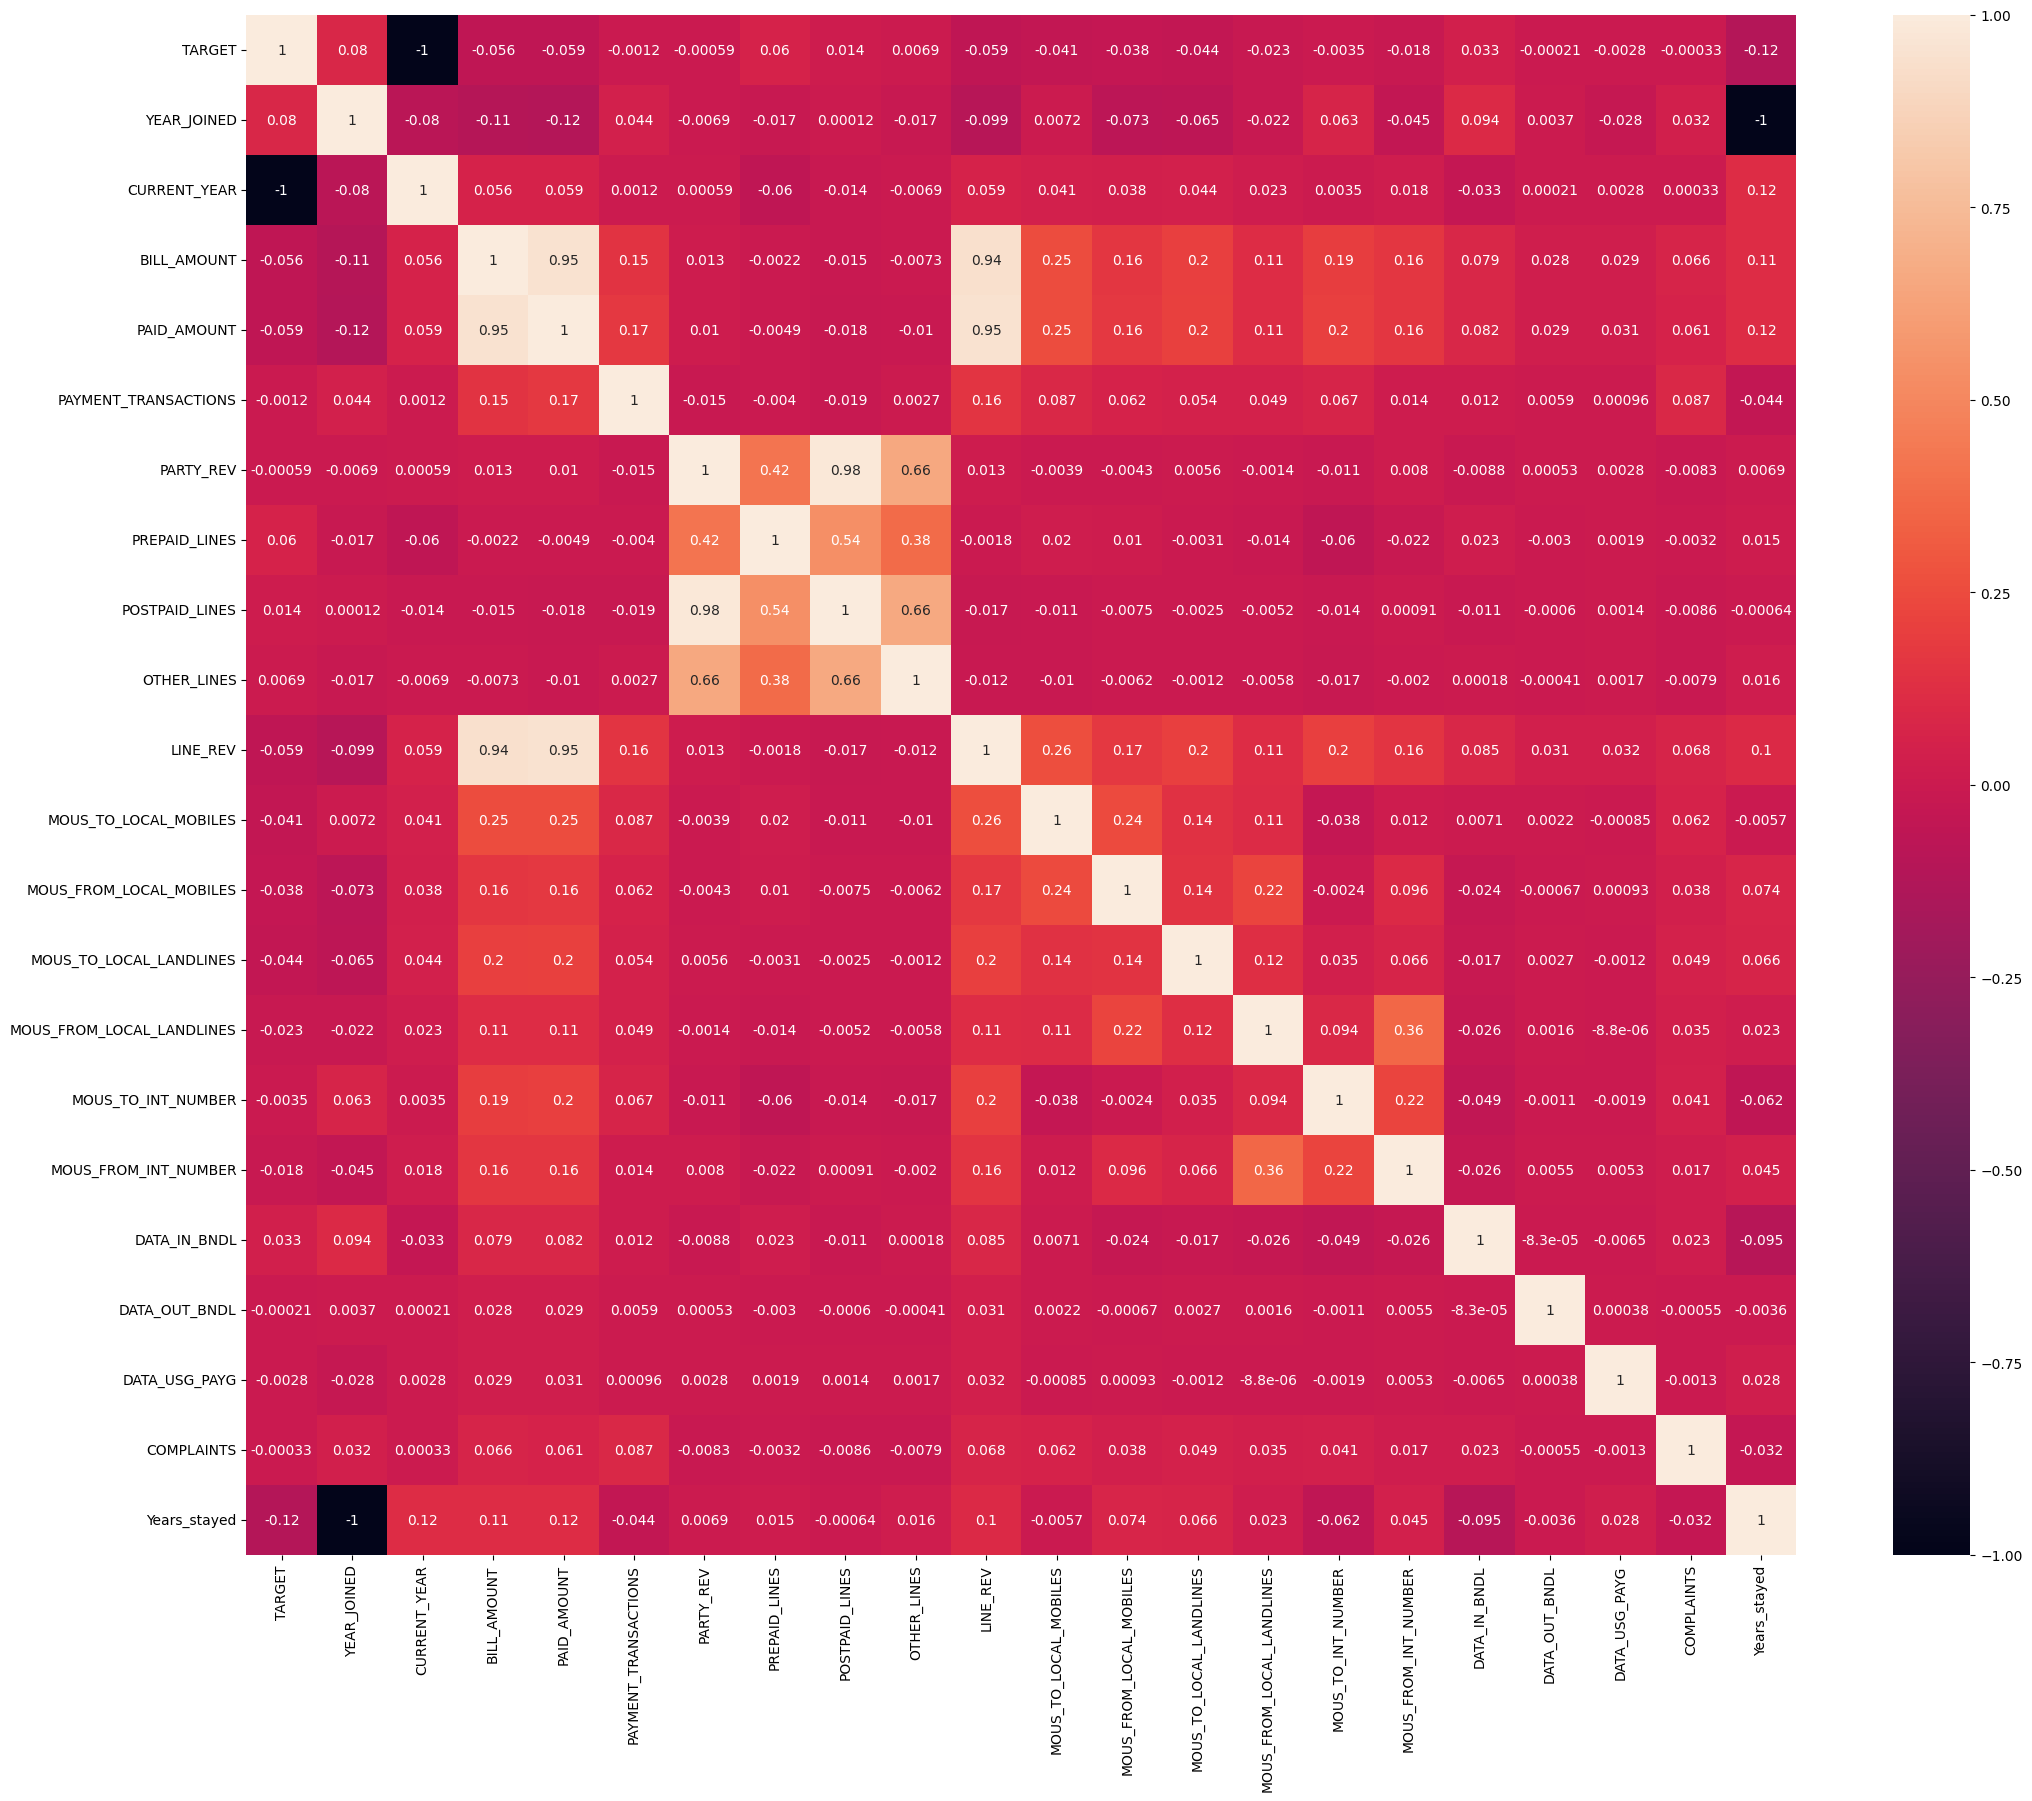

In [29]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(numeric_only=True),annot=True)

This observation indicates that the columns PARTY_REV, COMPLAINTS, PAYMENT_TRANSACTIONS, DATA_OUT_BNDL, OTHER_LINES, DATA_USG_PAYG, and MOU_TO_INT_NUMBER have a very weak correlation with the churn rate. It might not have a significant impact on the churn rate, and further analysis is needed to determine the actual reasons behind the churn. Additionally, other factors such as customer service, network quality, and pricing could also play a role in the churn rate.

# Feature Selection

In [30]:
data.columns

Index(['PTY_PROFILE_SUB_TYPE', 'SOCIO_ECONOMIC_SEGMENT', 'PARTY_NATIONALITY',
       'PARTY_GENDER_CD', 'TARGET', 'YEAR_JOINED', 'CURRENT_YEAR',
       'BILL_AMOUNT', 'PAID_AMOUNT', 'PAYMENT_TRANSACTIONS', 'PARTY_REV',
       'PREPAID_LINES', 'POSTPAID_LINES', 'OTHER_LINES', 'LINE_REV', 'STATUS',
       'MOUS_TO_LOCAL_MOBILES', 'MOUS_FROM_LOCAL_MOBILES',
       'MOUS_TO_LOCAL_LANDLINES', 'MOUS_FROM_LOCAL_LANDLINES',
       'MOUS_TO_INT_NUMBER', 'MOUS_FROM_INT_NUMBER', 'DATA_IN_BNDL',
       'DATA_OUT_BNDL', 'DATA_USG_PAYG', 'COMPLAINTS', 'Years_stayed'],
      dtype='object')

In [31]:
df = data[['PTY_PROFILE_SUB_TYPE', 'SOCIO_ECONOMIC_SEGMENT', 'TARGET',
       'YEAR_JOINED', 'BILL_AMOUNT', 'PAID_AMOUNT', 'PREPAID_LINES',
       'LINE_REV', 'MOUS_TO_LOCAL_MOBILES', 'MOUS_FROM_LOCAL_MOBILES',
       'MOUS_TO_LOCAL_LANDLINES', 'MOUS_FROM_LOCAL_LANDLINES', 'DATA_IN_BNDL',
       'Years_stayed']]

In [32]:
df['SOCIO_ECONOMIC_SEGMENT'] = df['SOCIO_ECONOMIC_SEGMENT'].astype('category')
df['SOCIO_ECONOMIC_SEGMENT'] = df['SOCIO_ECONOMIC_SEGMENT'].cat.codes

df['PTY_PROFILE_SUB_TYPE'] = df['PTY_PROFILE_SUB_TYPE'].astype('category')
df['PTY_PROFILE_SUB_TYPE'] = df['PTY_PROFILE_SUB_TYPE'].cat.codes

C:\Users\User\AppData\Local\Temp\ipykernel_644\3472446030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOCIO_ECONOMIC_SEGMENT'] = df['SOCIO_ECONOMIC_SEGMENT'].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_644\3472446030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOCIO_ECONOMIC_SEGMENT'] = df['SOCIO_ECONOMIC_SEGMENT'].cat.codes
C:\Users\User\AppData\Local\Temp\ipykernel_644\3472446030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140124 entries, 0 to 1140614
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PTY_PROFILE_SUB_TYPE       1140124 non-null  int8   
 1   SOCIO_ECONOMIC_SEGMENT     1140124 non-null  int8   
 2   TARGET                     1140124 non-null  int64  
 3   YEAR_JOINED                1140124 non-null  int64  
 4   BILL_AMOUNT                1140124 non-null  float64
 5   PAID_AMOUNT                1140124 non-null  float64
 6   PREPAID_LINES              1140124 non-null  int64  
 7   LINE_REV                   1140124 non-null  float64
 8   MOUS_TO_LOCAL_MOBILES      1140124 non-null  float64
 9   MOUS_FROM_LOCAL_MOBILES    1140124 non-null  float64
 10  MOUS_TO_LOCAL_LANDLINES    1140124 non-null  float64
 11  MOUS_FROM_LOCAL_LANDLINES  1140124 non-null  float64
 12  DATA_IN_BNDL               1140124 non-null  float64
 13  Years_stayed

In [34]:
print(df['PTY_PROFILE_SUB_TYPE'].unique())
print(df['SOCIO_ECONOMIC_SEGMENT'].unique())
print(df['Years_stayed'].unique())
print(df['YEAR_JOINED'].unique())

[2 1 0]
[0 1 2]
[25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  5  4  7  6  2  1
  0  3]
[1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2014 2011 2012 2013 2017 2018 2015 2016]


# Model Training

In [35]:
X = df.drop(['TARGET'],axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=df['TARGET'])
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.33,random_state=42)

In [36]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train = X_train_scaled

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test = X_test_scaled

X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_val = X_val_scaled

<AxesSubplot: >

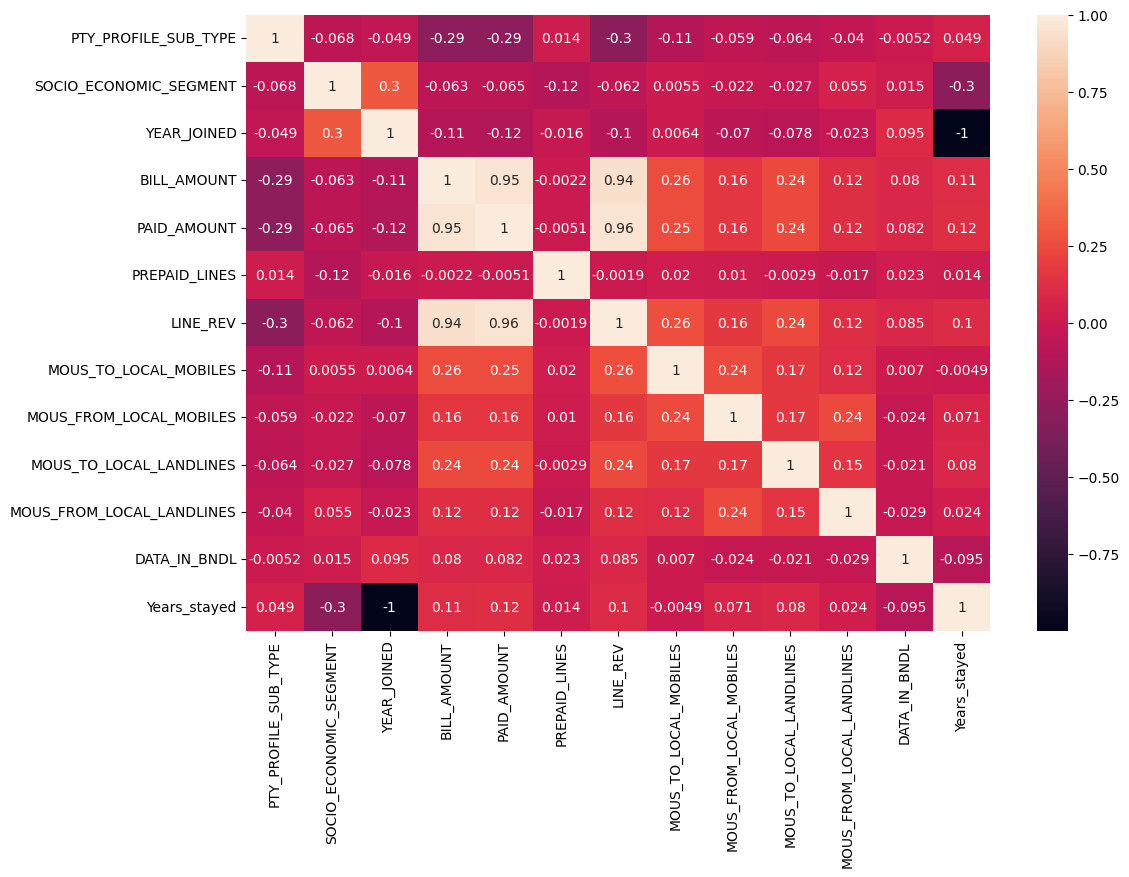

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_train.corr(),annot=True)

# Model Training

## Logistic Regression

In [38]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)
print("Classification Report of Logistic Regression:")
print(classification_report(y_val, y_pred_lr))

Accuracy of Logistic Regression: 0.9996310724288129
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238858
           1       1.00      0.99      1.00     13224

    accuracy                           1.00    252082
   macro avg       1.00      1.00      1.00    252082
weighted avg       1.00      1.00      1.00    252082



## Decision Tree

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Classification Report of Decision Tree:")
print(classification_report(y_val, y_pred_dt))

Accuracy of Decision Tree: 0.9998928919954618
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238858
           1       1.00      1.00      1.00     13224

    accuracy                           1.00    252082
   macro avg       1.00      1.00      1.00    252082
weighted avg       1.00      1.00      1.00    252082



## Random Forest

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)
print("Classification Report of Random Forest:")
print(classification_report(y_val, y_pred_rf))

Accuracy of Random Forest: 0.9952713799477948
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238858
           1       1.00      0.91      0.95     13224

    accuracy                           1.00    252082
   macro avg       1.00      0.95      0.98    252082
weighted avg       1.00      1.00      1.00    252082



## Evaluation Of Best Model

In [41]:
y_train_pred_lr = lr.predict(X_train)
y_train_pred_dt = dt.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

print("train Accuracy of Logistic Regression:", accuracy_score(y_train, y_train_pred_lr))
print("train Accuracy of Decision Tree:", accuracy_score(y_train, y_train_pred_dt))
print("train Accuracy of Random Forest:", accuracy_score(y_train, y_train_pred_rf))

train Accuracy of Logistic Regression: 0.9994665895533615
train Accuracy of Decision Tree: 1.0
train Accuracy of Random Forest: 0.9999980461155801


In [42]:
y_test_pred_lr = lr.predict(X_test)
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)

print("Test Accuracy of Logistic Regression:", accuracy_score(y_test, y_test_pred_lr))
print("Test Accuracy of Decision Tree:", accuracy_score(y_test, y_test_pred_dt))
print("Test Accuracy of Random Forest:", accuracy_score(y_test, y_test_pred_rf))

Test Accuracy of Logistic Regression: 0.9994923466607839
Test Accuracy of Decision Tree: 0.9998697643265886
Test Accuracy of Random Forest: 0.9953992254964238


In [43]:
best_model = max(accuracy_lr, accuracy_dt, accuracy_rf)

if best_model == accuracy_lr:
    print("Logistic Regression is the best model with accuracy:", accuracy_lr)
    y_pred = y_pred_lr
elif best_model == accuracy_dt:
    print("Decision Tree is the best model with accuracy:", accuracy_dt)
    y_pred = y_pred_dt
elif best_model == accuracy_rf:
    print("Random Forest is the best model with accuracy:", accuracy_rf)
    y_pred = y_pred_rf
else:
    print('Error')

Decision Tree is the best model with accuracy: 0.9998928919954618


# Confusion Matrix of Actual and Predicted Value

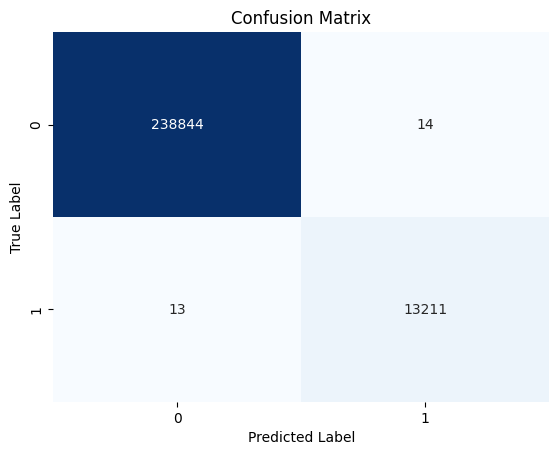

In [44]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()